**1. Data Analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# uploading the data set to a data frame
df = pd.read_csv("/content/data.csv")

# printing the data set
print(df.head())

print(df.describe())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [2]:
# min and max for each numeric attribute

print("min and max for age")

min_data = df["Age"].min()
print(min_data)

max_data = df["Age"].max()
print(max_data)

print("min and max for Height")

min_data = df["Height"].min()
print(min_data)

max_data = df["Height"].max()
print(max_data)


print("min and max for Weight")

min_data = df["Weight"].min()
print(min_data)

max_data = df["Weight"].max()
print(max_data)

print("min and max for FCVC")

min_data = df["FCVC"].min()
print(min_data)

max_data = df["FCVC"].max()
print(max_data)

print("min and max for NCP")

min_data = df["NCP"].min()
print(min_data)

max_data = df["NCP"].max()
print(max_data)

print("min and max for CH2O")

min_data = df["CH2O"].min()
print(min_data)

max_data = df["CH2O"].max()
print(max_data)


print("min and max for FAF")

min_data = df["FAF"].min()
print(min_data)

max_data = df["FAF"].max()
print(max_data)


print("min and max for TUE")

min_data = df["TUE"].min()
print(min_data)

max_data = df["TUE"].max()
print(max_data)


print("Q1, Q2, Q3 for each numeric attribute")
df.quantile(q=[0.25 , 0.5 , 0.75] , axis = 0 , numeric_only = True)

min and max for age
14.0
61.0
min and max for Height
1.45
1.98
min and max for Weight
39.0
173.0
min and max for FCVC
1.0
3.0
min and max for NCP
1.0
4.0
min and max for CH2O
1.0
3.0
min and max for FAF
0.0
3.0
min and max for TUE
0.0
2.0
Q1, Q2, Q3 for each numeric attribute


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0.25,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.00000
0.50,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.62535
0.75,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.00000


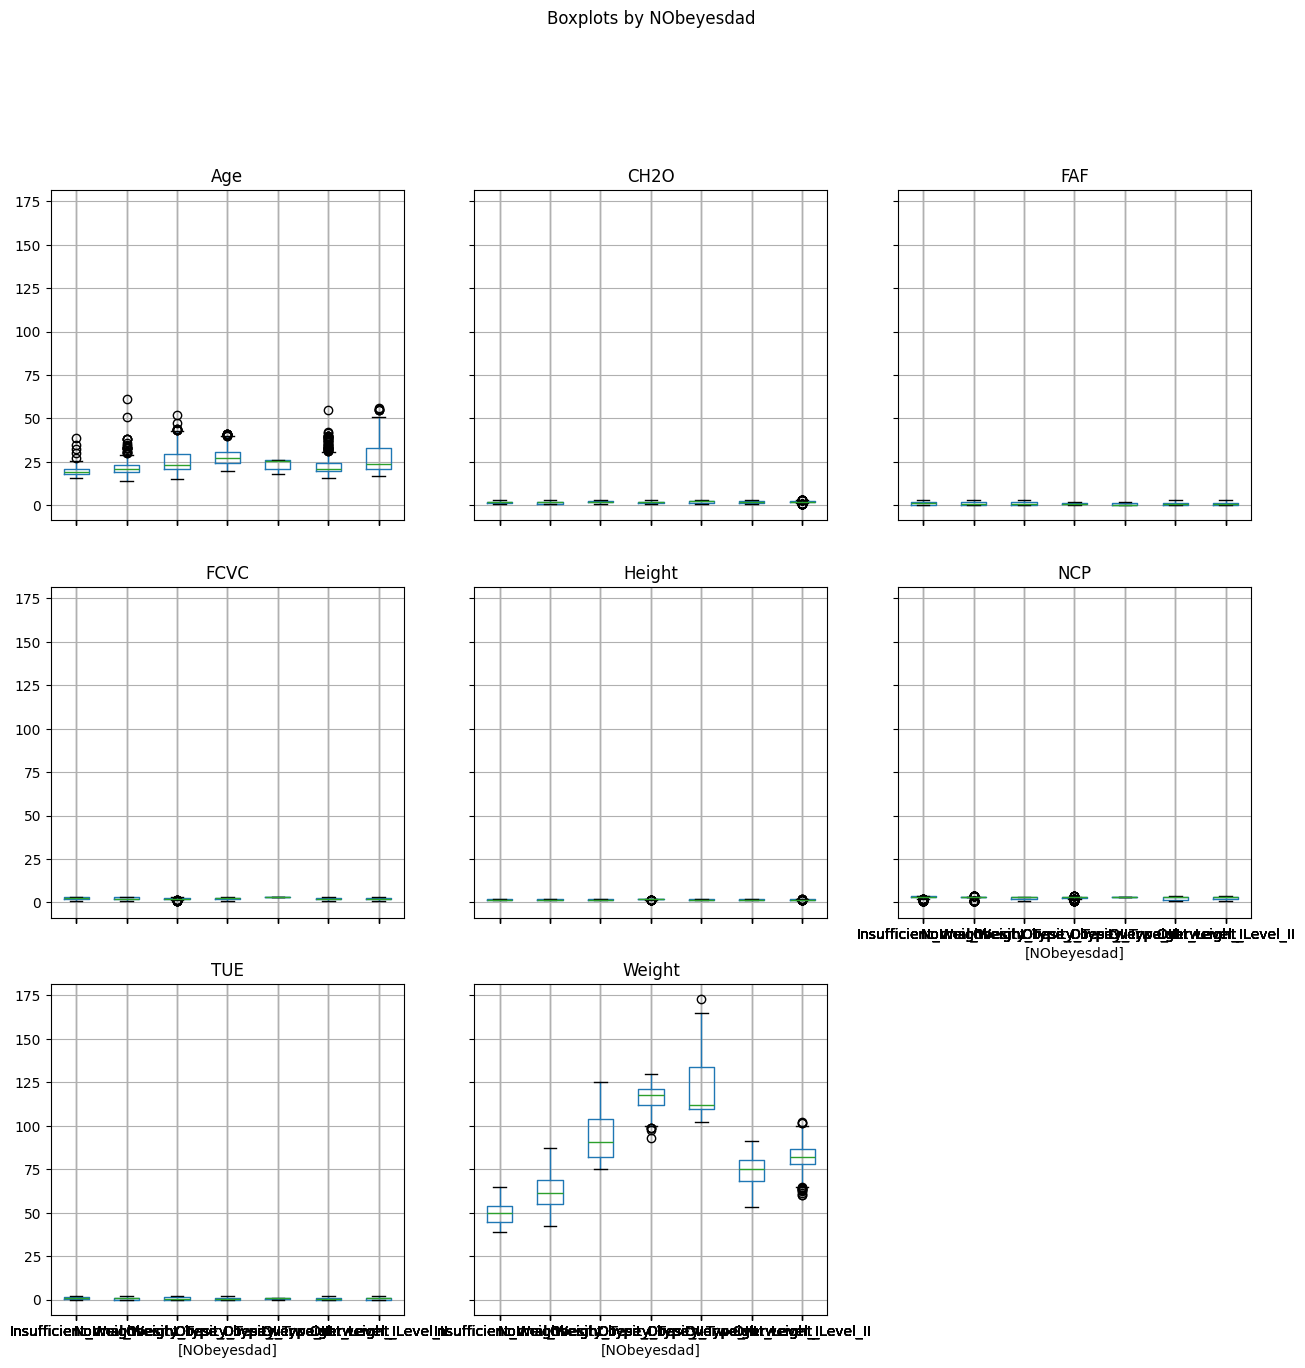

In [ ]:
df.boxplot(by='NObeyesdad', figsize=(15, 15))
plt.suptitle('Boxplots by NObeyesdad', y=1.02)
plt.show()

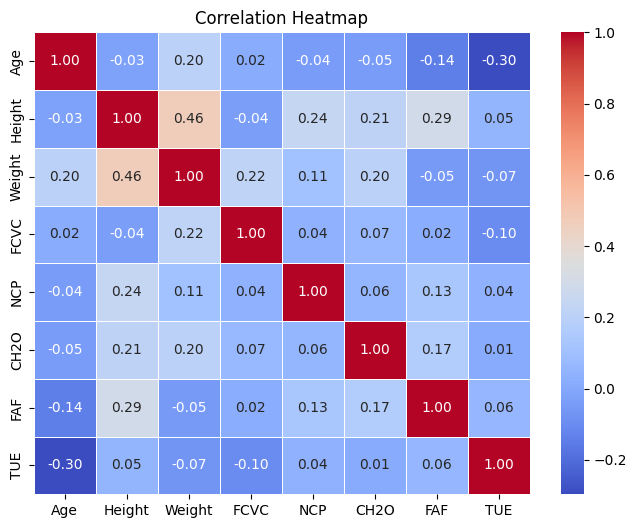

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The **heat map** identifies the pattren and correlation between the features in the data set. It represents the the positive correlation with warmer color, while the negative correlation with cooler colors.

It can be seen that **Height** and **Weight** are correlated, which make sense, while most eating habit and activity-related variables (e.g., FCVC, NCP, CH2O, FAF) show very weak correlations with each other, indicating they contribute independent information, also we notice the negative correlation between **Age** and **TUE** (time spent using technologies) where older people tend to spend less time using technologies.

This heatmap is useful for preprocessing because it helps identify redundant features (highly correlated variables). Since no pair of variables is strongly correlated, feature removal is not strictly necessary.

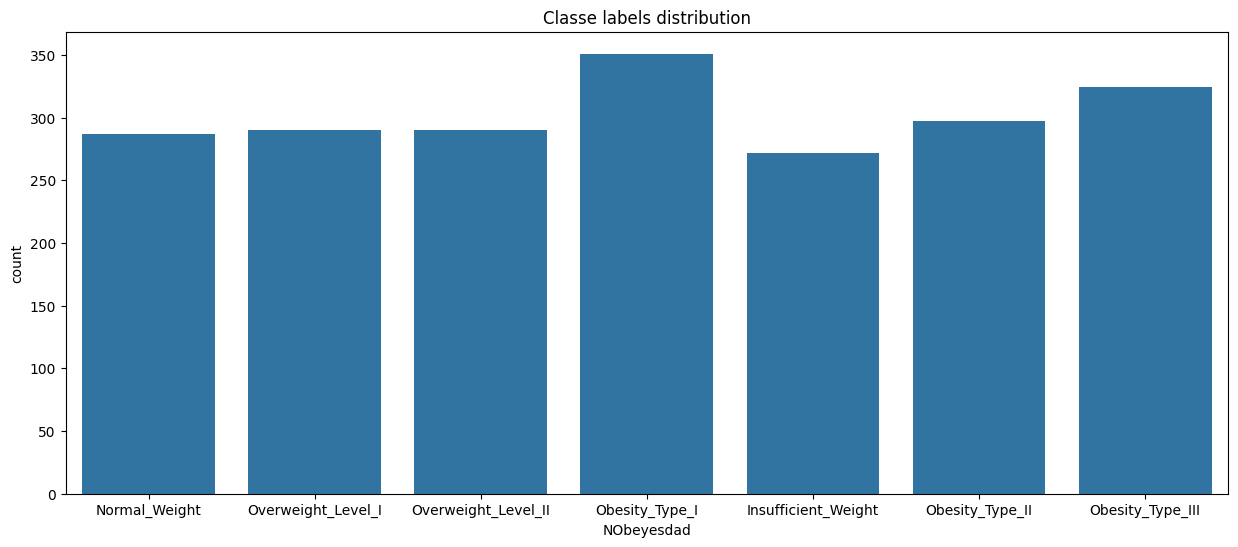

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Classe labels distribution')
plt.show()

The **bar chart** illustrates the distribution of **obesity levels** (class labels) within the dataset. The categories range from Insufficient Weight through Normal Weight, Overweight Levels I & II, to Obesity Types I, II, and III. The plot shows that while the classes are not perfectly balanced, they are relatively evenly distributed, with no single category overwhelmingly dominating the dataset.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

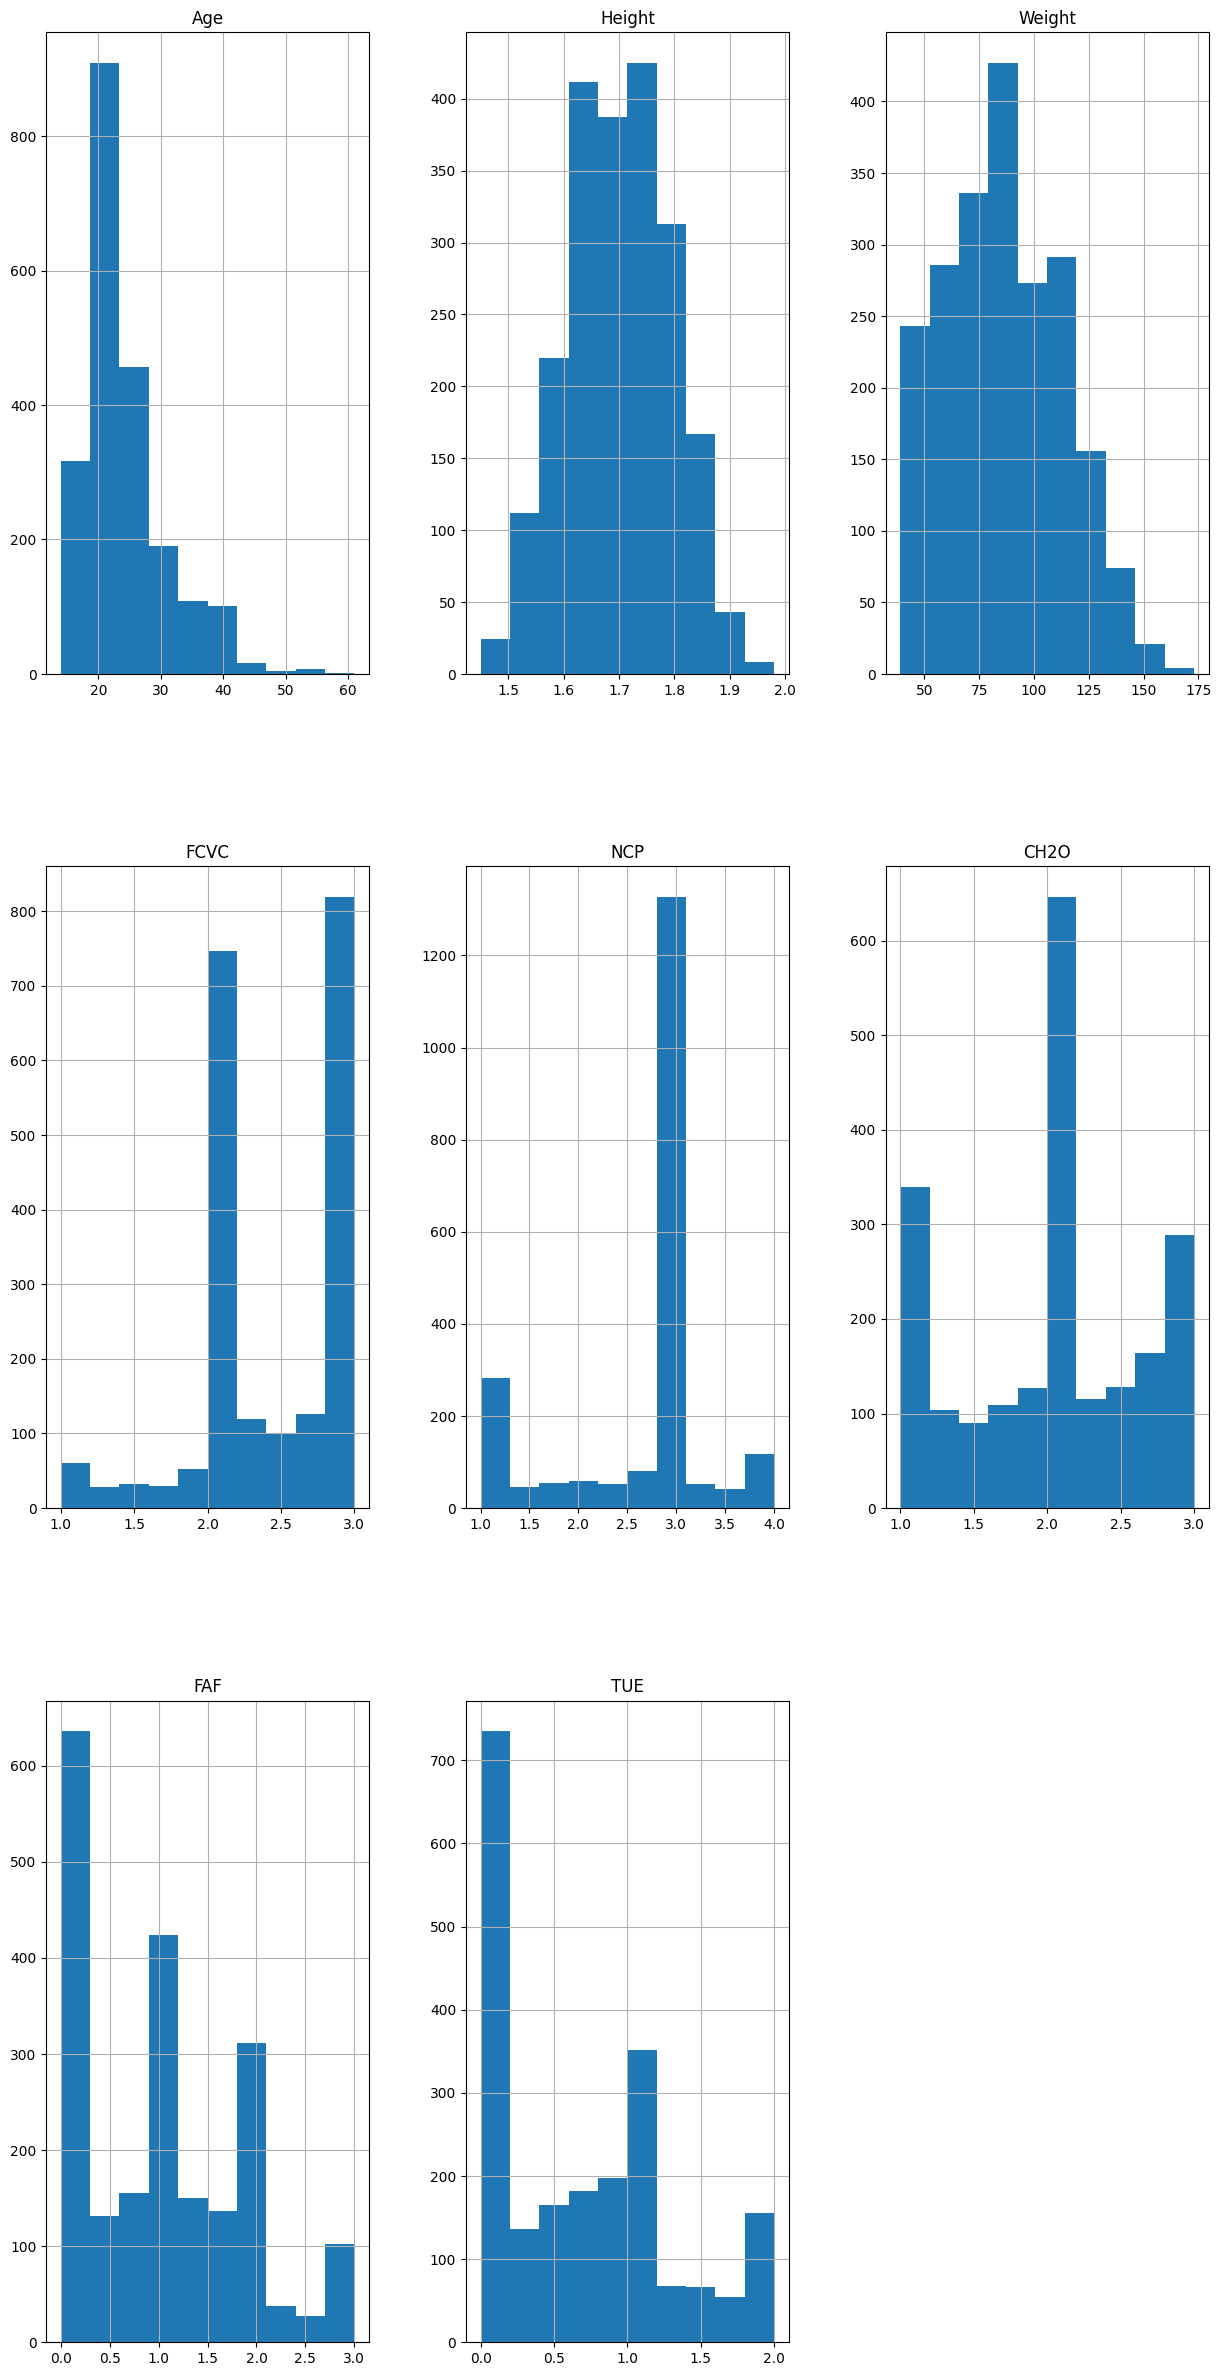

In [ ]:
df.hist(figsize=(15, 30))

The histograms display the distributions of the numerical attributes in the dataset, such as age, height, weight, and various eating/physical activity measures. Several important observations can be made:

* **Age**: The distribution is right-skewed, with most participants being young adults (under 30). This skewness suggests that scaling methods or transformations may be helpful to reduce bias towards the younger population.

* **Height** and **Weight**: Both are approximately bell-shaped, though weight shows some spread with possible outliers at the higher end. Outliers may need to be treated depending on the chosen model.

* **FCVC** (Frequency of vegetable consumption), **NCP** (Number of main meals), **CH2O** (Daily water intake): These variables are concentrated around specific values (e.g., most participants report 2–3 meals per day, moderate water consumption, and frequent vegetable consumption). The strong clustering indicates that categorical encoding (ordinal) might be suitable if treated as discrete levels.

* **FAF** (Physical activity frequency) and **TUE** (Time using technology devices): Both show skewed distributions. Many participants report low physical activity but high technology use. Such skewness can impact model performance and suggests normalization or binning may improve representation.


Overall, the histograms highlight the need for normalization of continuous variables (e.g., age, weight) and outlier handling.

**2. Data Preprocessing**

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Create a working copy of data
df_processed = df.copy()

# Clean column names (essential step)
df_processed.columns = df_processed.columns.str.strip().str.replace('"', '').str.replace(' ', '_')

print("--- Data Preprocessing Started ---")
print("Raw Dataset Shape:", df_processed.shape)

--- Data Preprocessing Started ---
Raw Dataset Shape: (2111, 17)


In [4]:
missing_values = df_processed.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)
print ("\nTotal number of missing values in the dataset:", missing_values.sum())


Missing Values in Each Column:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Total number of missing values in the dataset: 0


In [5]:
print("Original shape:", df.shape)

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df_no_outliers = df.copy()

for col in numeric_cols:
    mean_val = df_no_outliers[col].mean()
    differences = abs(df_no_outliers[col] - mean_val)
    max_idx = differences.idxmax()
    df_no_outliers = df_no_outliers.drop(max_idx)
    print(f"Removed one outlier from column: {col}")

print("\nAfter removing outliers using Mean method on all numeric columns:")
print("New shape:", df_no_outliers.shape)

print("\nOriginal DataFrame:")
print(df.head(10))

print("\nDataFrame after removing outliers:")
print(df_no_outliers.head(10))

df_no_outliers.to_csv("Preprocessed_dataset.csv", index=False)
print("\n✅ Saved as Preprocessed_dataset.csv")

Original shape: (2111, 17)
Removed one outlier from column: Age
Removed one outlier from column: Height
Removed one outlier from column: Weight
Removed one outlier from column: FCVC
Removed one outlier from column: NCP
Removed one outlier from column: CH2O
Removed one outlier from column: FAF
Removed one outlier from column: TUE

After removing outliers using Mean method on all numeric columns:
New shape: (2103, 17)

Original DataFrame:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   
5    Male  29.0    1.62    53.0                             no  yes   2.0   
6  Female  23.0    1

In [6]:
# Technique 2: One-Hot Encoding for Categorical Features
categorical_for_ohe = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
    'SMOKE', 'SCC', 'CALC', 'MTRANS'
]

df_processed = pd.get_dummies(df_processed, columns=categorical_for_ohe, drop_first=True)

print("\n[TECHNIQUE 2] Categorical features encoded using One-Hot Encoding.")
print(df_processed)


[TECHNIQUE 2] Categorical features encoded using One-Hot Encoding.
            Age    Height      Weight  FCVC  NCP      CH2O       FAF  \
0     21.000000  1.620000   64.000000   2.0  3.0  2.000000  0.000000   
1     21.000000  1.520000   56.000000   3.0  3.0  3.000000  3.000000   
2     23.000000  1.800000   77.000000   2.0  3.0  2.000000  2.000000   
3     27.000000  1.800000   87.000000   3.0  3.0  2.000000  2.000000   
4     22.000000  1.780000   89.800000   2.0  1.0  2.000000  0.000000   
...         ...       ...         ...   ...  ...       ...       ...   
2106  20.976842  1.710730  131.408528   3.0  3.0  1.728139  1.676269   
2107  21.982942  1.748584  133.742943   3.0  3.0  2.005130  1.341390   
2108  22.524036  1.752206  133.689352   3.0  3.0  2.054193  1.414209   
2109  24.361936  1.739450  133.346641   3.0  3.0  2.852339  1.139107   
2110  23.664709  1.738836  133.472641   3.0  3.0  2.863513  1.026452   

           TUE           NObeyesdad  Gender_Male  ...  CAEC_no  SMO

In [7]:
# Technique 3: Feature Scaling using Standardization (Z-Score)
cols_to_scale = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

scaler = StandardScaler()
df_processed[cols_to_scale] = scaler.fit_transform(df_processed[cols_to_scale])

print("\n[TECHNIQUE 3] Numeric features scaled using Standardization (Z-Score).")
print(df_processed)


[TECHNIQUE 3] Numeric features scaled using Standardization (Z-Score).
           Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0    -0.522124 -0.875589 -0.862558 -0.785019  0.404153 -0.013073 -1.188039   
1    -0.522124 -1.947599 -1.168077  1.088342  0.404153  1.618759  2.339750   
2    -0.206889  1.054029 -0.366090 -0.785019  0.404153 -0.013073  1.163820   
3     0.423582  1.054029  0.015808  1.088342  0.404153 -0.013073  1.163820   
4    -0.364507  0.839627  0.122740 -0.785019 -2.167023 -0.013073 -1.188039   
...        ...       ...       ...       ...       ...       ...       ...   
2106 -0.525774  0.097045  1.711763  1.088342  0.404153 -0.456705  0.783135   
2107 -0.367195  0.502844  1.800914  1.088342  0.404153 -0.004702  0.389341   
2108 -0.281909  0.541672  1.798868  1.088342  0.404153  0.075361  0.474971   
2109  0.007776  0.404927  1.785780  1.088342  0.404153  1.377801  0.151471   
2110 -0.102119  0.398344  1.790592  1.088342  0.404153  1.396035  0.01

In [8]:
import os

print("\n--- Preprocessing Results ---")
print("Final Preprocessed Dataset Shape:", df_processed.shape)

# Display a snapshot of the processed data (Required)
print("\nSnapshot of the Final Preprocessed Dataset:")
print(df_processed.head())

# Save the processed data (Required)
output_dir = 'Dataset'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
df_processed.to_csv(os.path.join(output_dir, 'Preprocessed_dataset.csv'), index=False)
print(f"\nProcessed data saved to '{os.path.join(output_dir, 'Preprocessed_dataset.csv')}'.")


--- Preprocessing Results ---
Final Preprocessed Dataset Shape: (2111, 24)

Snapshot of the Final Preprocessed Dataset:
        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.522124 -0.875589 -0.862558 -0.785019  0.404153 -0.013073 -1.188039   
1 -0.522124 -1.947599 -1.168077  1.088342  0.404153  1.618759  2.339750   
2 -0.206889  1.054029 -0.366090 -0.785019  0.404153 -0.013073  1.163820   
3  0.423582  1.054029  0.015808  1.088342  0.404153 -0.013073  1.163820   
4 -0.364507  0.839627  0.122740 -0.785019 -2.167023 -0.013073 -1.188039   

        TUE           NObeyesdad  Gender_Male  ...  CAEC_no  SMOKE_yes  \
0  0.561997        Normal_Weight        False  ...    False      False   
1 -1.080625        Normal_Weight        False  ...    False       True   
2  0.561997        Normal_Weight         True  ...    False      False   
3 -1.080625   Overweight_Level_I         True  ...    False      False   
4 -1.080625  Overweight_Level_II         True  ...    Fals